In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk.stem as Stemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#from gensim.utils import simple_preprocess
import os
from nltk import sent_tokenize


# 1. Data cleaning 
# 2. EDA
# 3. Text preprocessing
# 4. Model buliding
# 5. Evaluation
# 6. improvement
# 7. Website
# 8. Deployment


In [2]:
data = pd.read_csv('spam.csv')


In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
# story= []
# for files in os.listdir(r'C:\Users\krish\Downloads\AsianReligionsData'):
#     f=open(os.path.join(r'C:\Users\krish\Downloads\AsianReligionsData',files))
#     corpus = f.read()
#     row_sent = sent_tokenize(corpus)
#     for sent in row_sent:
#         story.append(sent)

In [5]:
data.shape

(5572, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
data.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
649,spam,"You have won ?1,000 cash or a ?2,000 prize! To...",NaN,NaN,NaN
5015,ham,Hey gals...U all wanna meet 4 dinner at n��te?,NaN,NaN,NaN
2853,ham,Haha... Hope �_ can hear the receipt sound... ...,NaN,NaN,NaN
2371,ham,"Hmm, too many of them unfortunately... Pics ob...",NaN,NaN,NaN
3541,ham,�� come lt 25 n pass to me lar,NaN,NaN,NaN
2723,ham,"Tunde, how are you doing. This is just wishing...",NaN,NaN,NaN
3558,spam,URGENT! We are trying to contact U Todays draw...,NaN,NaN,NaN
5378,spam,Free entry to the gr8prizes wkly comp 4 a chan...,NaN,NaN,NaN
4550,ham,Great. Have a safe trip. Dont panic surrender ...,NaN,NaN,NaN
1293,ham,Happy birthday... May all ur dreams come true...,NaN,NaN,NaN


In [8]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1 )

In [9]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [11]:
data['v2'].value_counts()

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed �1000 cash or �5000 prize!                     4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                      

In [12]:
data.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [13]:
data

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()
data['target']=encoder.fit_transform(data['target'])

In [16]:
data

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [17]:
# check missing value
data.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
#check for duplicat
data.duplicated().sum()

403

In [19]:
# remove the duplicate
data=data.drop_duplicates(keep='first')

In [20]:
data.duplicated().sum()

0

In [21]:
data.shape

(5169, 2)

In [22]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [23]:
import matplotlib.pyplot as plt

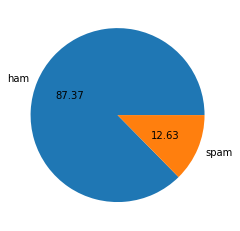

In [24]:
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
data['num_char']=data['text'].apply(len)

<ipython-input-26-87652618a2de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_char']=data['text'].apply(len)


In [27]:
data

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will �_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [28]:
# count number of words 
data['num_words']=data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

<ipython-input-28-ce59a6e32ca6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words']=data['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [29]:
data['num_words']

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: num_words, Length: 5169, dtype: int64

In [30]:
data['text'][5568]

'Will �_ b going to esplanade fr home?'

In [31]:
data['num_sentence']=data['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

<ipython-input-31-e4b23d63c25b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sentence']=data['text'].apply(lambda x : len(nltk.sent_tokenize(x)))


In [32]:
data

,target,text,num_char,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will �_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [33]:
data[['num_char','num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
data[data['target'] == 0][['num_char','num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
data[data['target']==1][['num_char','num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [36]:
import seaborn as sns

<AxesSubplot:xlabel='num_char', ylabel='Count'>

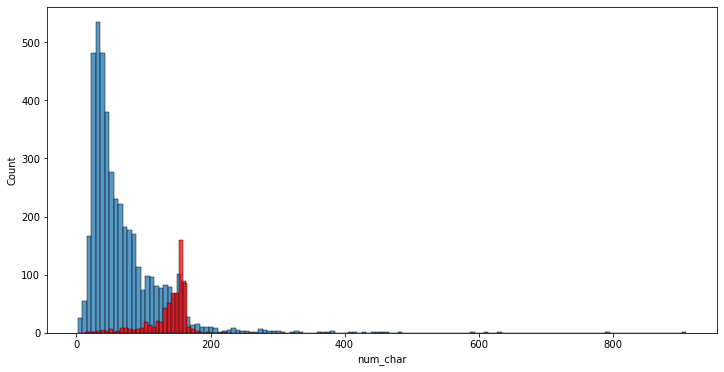

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_char'])
sns.histplot(data[data['target']==1]['num_char'],color='r')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

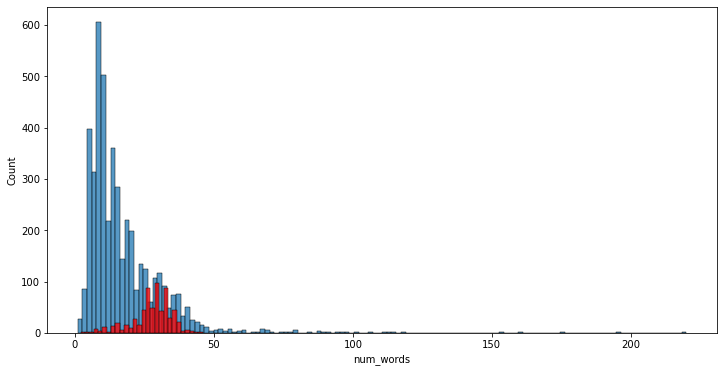

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_words'])
sns.histplot(data[data['target']==1]['num_words'],color='r')

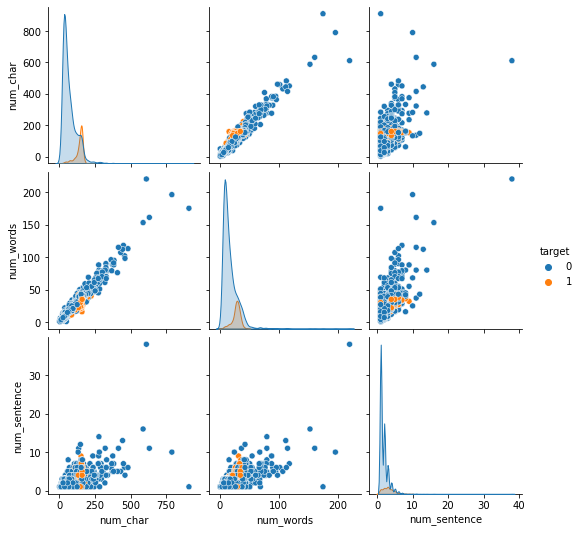

In [39]:
sns.pairplot(data, hue='target')

<AxesSubplot:>

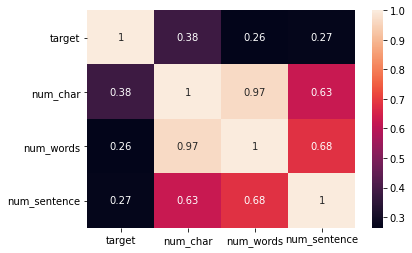

In [40]:
sns.heatmap(data.corr(),annot=True)

# Text Preprocessing
## lower case
## tokenizaton
## removing special character 
## removing stop words and punctuation
## stemming

In [41]:
def word_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y= []
    return text

In [42]:
word_transform('hi how are you %% eg')

['hi', 'how', 'are', 'you', '%', '%', 'eg']

In [43]:
# def remove_special(text):
#     patter = r'[^a-zA-Z0-9]'
#     clean_text = re.sub(patter,'',text)
#     cleaned_text = remove_special(text)
#     return cleaned_text

In [44]:
import string
string.punctuation
#def porter_stemmer(word):
ps = PorterStemmer()
ps.stem("krihsna ji i love you")

'krihsna ji i love y'

In [45]:
def remove_special_char(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y= []
    for i in text :
        if i.isalnum():
            y.append(i)
    text= y[:]
    y.clear()
    for i in text :
        if i not in stopwords.words('english') and i  not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    #for i in text :
    for i in text :
            y.append(ps.stem(i))
            
    return " ".join(y)
remove_special_char("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [46]:
data['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [47]:
data['transf_text']=data['text'].apply(remove_special_char)

<ipython-input-47-415020bb98b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transf_text']=data['text'].apply(remove_special_char)


In [48]:
data

,target,text,num_char,num_words,num_sentence,transf_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will �_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [49]:
#!pip install wordcloud
from wordcloud import WordCloud
wc= WordCloud(width=50, height =400,min_font_size=10,max_words=200, background_color='r' )
ss=wc.generate(data[data['target']== 1]['transf_text'].str.cat(sep=" "))

In [50]:
# from wordcloud import WordCloud
# wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
# spam_wc = wc.generate(data[data['target'] == 1]['transf_text'].str.cat(sep=" "))
# plt.figure(figsize=(15,6))
# plt.imshow(spam_wc)

In [51]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
spam_mess=[]
for msg in data[data['target']==1]['transf_text'].tolist():
    for word in msg.split():
        spam_mess.append(word)
        

In [53]:
len(spam_mess)

9941

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


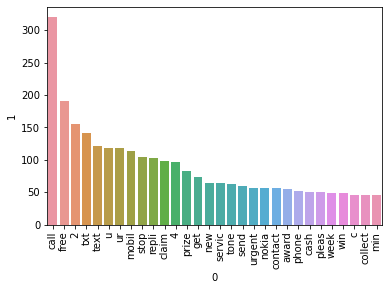

In [54]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_mess).most_common(30))[0],pd.DataFrame(Counter(spam_mess).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [55]:
ham_mess=[]
for mess in data[data['target']== 0]['transf_text'].tolist():
    for words in mess.split():
        ham_mess.append(words)

In [56]:
len(ham_mess)

35303

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


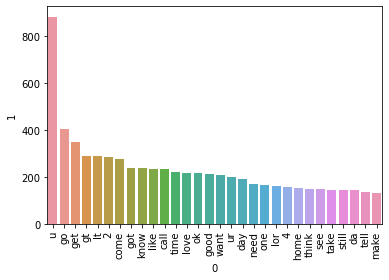

In [57]:
sns.barplot(pd.DataFrame(Counter(ham_mess).most_common(30))[0],pd.DataFrame(Counter(ham_mess).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


# Model Building

In [58]:
cv=CountVectorizer()
tfidf= TfidfVectorizer()
X=tfidf.fit_transform(data['transf_text']).toarray()
X.shape

(5169, 6677)

In [59]:
y=data['target'].values

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)

In [61]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb =BernoulliNB()

In [63]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))



0.874274661508704
[[791 105]
 [ 25 113]]
0.518348623853211


In [64]:
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [65]:
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


# ---> i will prefer for MultinomialNB becouse precision_score good

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [79]:
lgr = LogisticRegression(solver='liblinear', penalty='l1')
rfr = RandomForestClassifier(n_estimators=50, random_state=2)
mnb = MultinomialNB()
knc = KNeighborsClassifier()
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
#gbr = GradientBoostingRegressor(n_estimators=50, random_state=2)
#etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)
sv = SVC(kernel='sigmoid', gamma=1.0)


In [85]:
clf ={'LGR':lgr,'RFR': rfr, 'KNC':knc ,'ABC': abc, 'GBC': gbc,'XGB':xgb,'SVC':sv}

In [81]:
def train_classifier(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy, precision

In [82]:
train_classifier(rfr,X_train,X_test,y_train,y_test)

(0.9700193423597679, 0.9908256880733946)

In [83]:
accuracy_scores=[]
precision_scores=[]
for name, clf in clf.items():
    currrent_accuracy, current_precision = train_classifier(clf,X_train,X_test,y_train,y_test)
    print("for ",name)
    print("Accauracy - ",currrent_accuracy)
    print("Precision -",current_precision)
    accuracy_scores.append(currrent_accuracy)
    precision_scores.append(current_precision)

for  LGR
Accauracy -  0.9516441005802708
Precision - 0.94
for  RFR
Accauracy -  0.9700193423597679
Precision - 0.9908256880733946
for  KNC
Accauracy -  0.9003868471953579
Precision - 1.0
for  ABC
Accauracy -  0.9622823984526112
Precision - 0.9541284403669725
for  GBC
Accauracy -  0.9516441005802708
Precision - 0.9313725490196079


C:\Users\krish\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:56:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
for  XGB
Accauracy -  0.971953578336557
Precision - 0.9504132231404959
for  SVM
Accauracy -  0.9729206963249516
Precision - 0.9741379310344828


In [86]:
pd.DataFrame({'Algorithm' :clf.keys(),'Accuracy':accuracy_scores,'precision':precision_scores })

,Algorithm,Accuracy,precision
0,LGR,0.951644,0.940000
1,RFR,0.970019,0.990826
2,KNC,0.900387,1.000000
3,ABC,0.962282,0.954128
4,GBC,0.951644,0.931373
5,XGB,0.971954,0.950413
6,SVC,0.972921,0.974138


In [1]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

NameError: name 'tfidf' is not defined

In [ ]:
# def remove_special_characters(text):
#     pattern = r'[^a-zA-Z0-9\s]'
#     stop_words = list(stopwords.words('english'))
#     text = text.split()
#     text = [word for word in text if word.lower() not in stop_words]
#     text = (' '.join(text))
#     #return filtered_text
    
#     text = re.sub(pattern, '', text)
#     for i in text:
#         text = PorterStemmer.stem(i)
#     for i in text:
#         #text = text.lower()
#         return text
# remove_special_characters("he is krishna jaiswal is he is smart @ boy boy i M ")



In [ ]:
# import nltk
# from nltk.corpus import stopwords

# #removeing the stopwords 
# def remove_stopwords(text):
#     stop_words = list(stopwords.words('english'))
#     tokens = text.split()
#     filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
#     filtered_text = (' '.join(filtered_tokens))
#     return filtered_text
# remove_stopwords("he is good cricketer krishna")

In [ ]:
pip install --upgrade pillow


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(data[data['target'] == 1]['transf_text'].str.cat(sep=" "))

In [ ]:
!pip install TransposedFont
